# Assignment

In [ ]:
%pip install -r requirements.txt

In [2]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Merge the datasets
df1 = pd.read_csv('Data_Class_1.csv')
df2 = pd.read_csv('Data_Class_3.csv')
df3 = pd.read_csv('Data_Class_4.csv')

# Concatenate the 3 datasets 
df = pd.concat([df1, df2, df3], ignore_index=True)

# Print the first lines of the final dataset
print(df.head())

# Verify number of lines and columns of dataset
total_lines, total_columns = df.shape

# Print the total number of lines
print(f"Total number of lines is: {total_lines}")

# Export Final CSV
df.to_csv('dataset.csv', index=False)


   Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0  41      2699                347      3                             0   
1  52      2739                323     25                            85   
2  53      2696                 72      2                            30   
3  56      2722                315     24                            30   
4  68      2919                 13     13                            90   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                           0                             2096   
1                          43                             3118   
2                           0                             3271   
3                          19                             3216   
4                           6                             5321   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0              213               234               159   
1              149               205

## Exploratory Analisys



<Figure size 1500x1000 with 0 Axes>

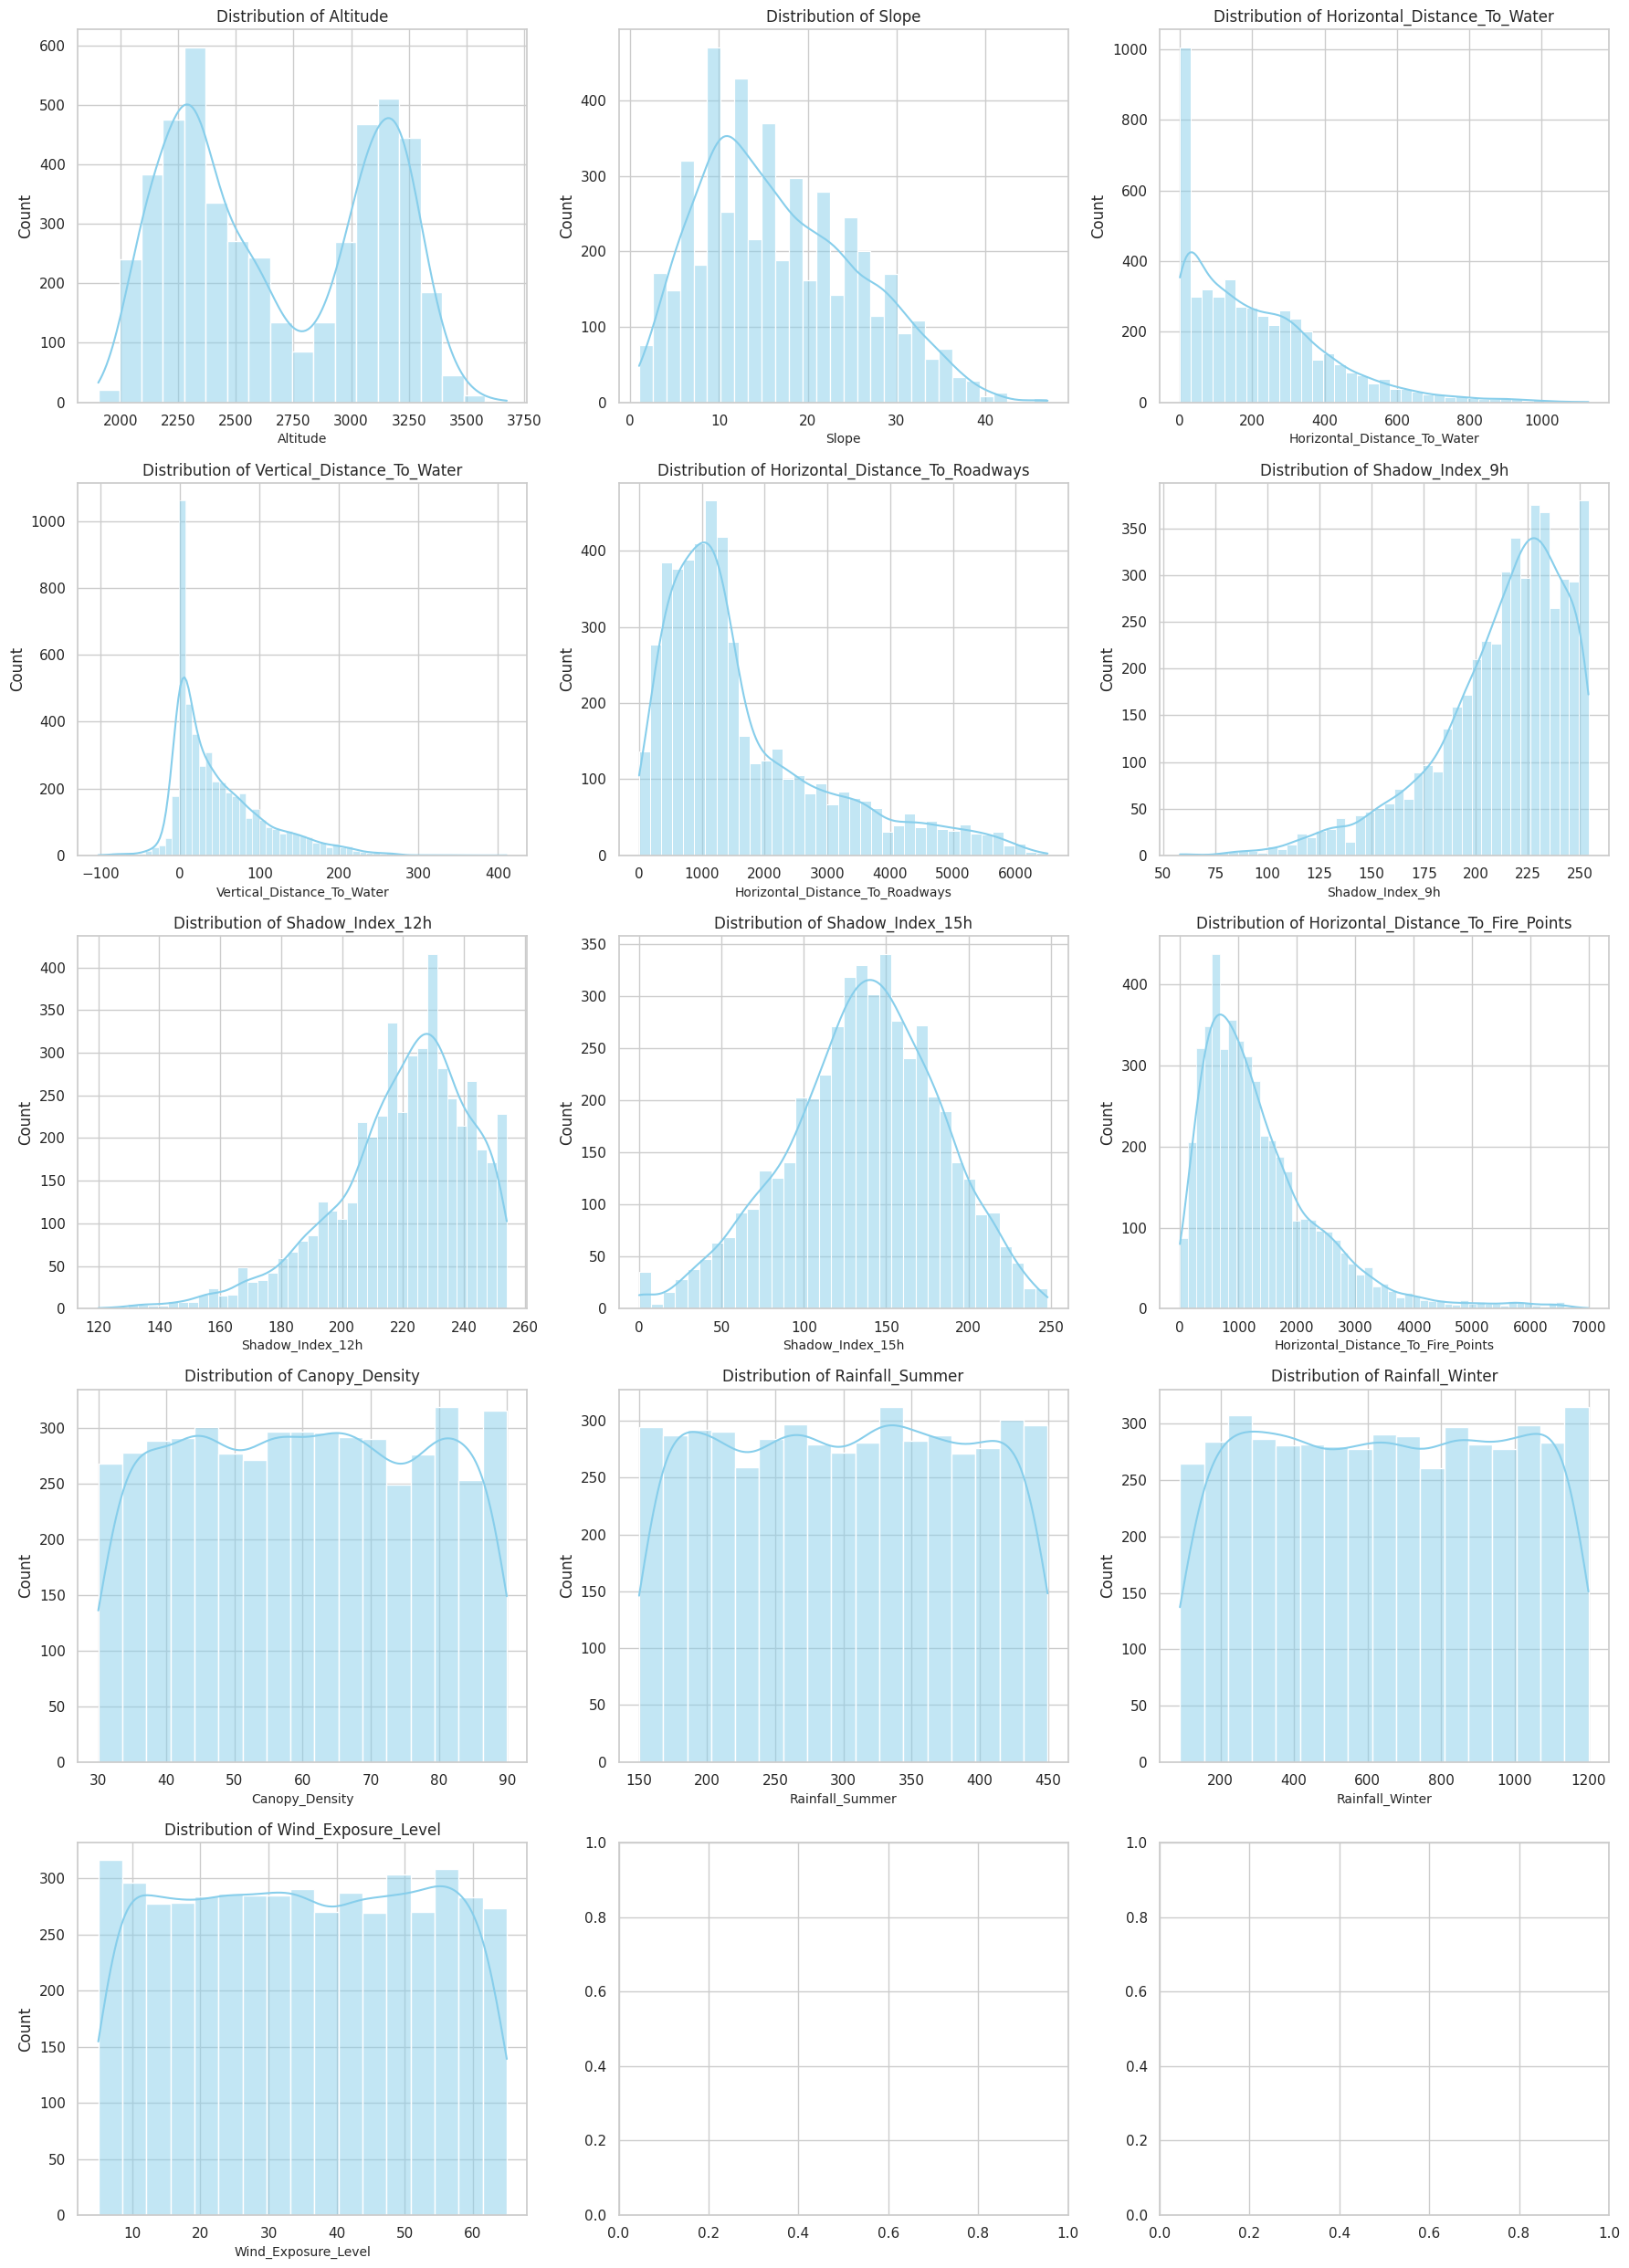

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,7666.403704,2683.500000,158.631687,16.802058,214.393416,48.723045,1672.105967,212.081070,219.67037,135.989918,1380.929835,60.122060,300.047944,648.913975,34.824609
std,4281.430130,433.403686,108.727205,8.866688,191.544909,58.133507,1345.791832,32.478175,22.45307,46.829938,1066.892197,17.278688,86.976939,322.266228,17.434933
min,41.000000,1903.000000,0.000000,1.000000,0.000000,-103.000000,0.000000,58.000000,120.00000,0.000000,0.000000,30.000000,150.070000,90.020000,5.000000
25%,3963.750000,2292.000000,68.000000,10.000000,60.000000,4.000000,726.000000,196.000000,208.00000,106.750000,633.000000,45.130000,223.547500,367.205000,19.620000
50%,7463.500000,2596.500000,129.000000,15.000000,175.000000,30.000000,1231.000000,219.000000,223.00000,138.000000,1110.000000,60.190000,301.085000,648.915000,34.660000
75%,11321.500000,3112.000000,261.000000,23.000000,323.000000,76.000000,2244.000000,236.000000,236.00000,169.000000,1816.000000,75.130000,374.652500,929.935000,50.060000
max,15118.000000,3675.000000,360.000000,47.000000,1129.000000,411.000000,6508.000000,254.000000,254.00000,248.000000,6993.000000,89.960000,449.790000,1199.970000,65.000000


In [4]:
# Exploratory Analisys of Data

import matplotlib.pyplot as plt
import seaborn as sns

# Graphs Configuration
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Inicial Statistic Resume of Numeric Variabels
summary_stats = df.describe()

# Plotting histograms of the main numerical variables
numerical_cols = ['Altitude', 'Slope', 'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water',
                  'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 'Shadow_Index_12h', 
                  'Shadow_Index_15h', 'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
                  'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level']

# Creating subplots to visualize distributions
fig, axes = plt.subplots(5, 3, figsize=(18, 25))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

summary_stats

# Logistic Regression

In [5]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

# Separating the data between features (X) and target (y)
X = df.drop('Vegetation_Type', axis=1)  # Classification of Solo Types
y = df['Vegetation_Type']

X_encoded = pd.get_dummies(X, drop_first=True)  # Converting categorical variables

# Data scaling for numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Dividing the data into training and test (Holdout)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model with class balancing
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000, class_weight='balanced')

# Training the model
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluating performance with appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0) # Correcting an error

# Displaying the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Stratified Cross Validation (StratifiedKFold)
kf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=kf, scoring='accuracy')

print(f'Cross Validation Accuracy (k=5): {np.mean(cv_scores)}')

# Average F1-Score in cross-validation
f1_cv_scores = cross_val_score(log_reg, X_scaled, y, cv=kf, scoring='f1_macro')
print(f'Cross Validation F1-Score (k=5): {np.mean(f1_cv_scores)}')

/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nando/Projects/aprau/.venv/lib/python3.12/site

Accuracy: 0.9248971193415638
Confusion Matrix:
[[430   8   0]
 [  1 276  41]
 [  0  23 193]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.98      0.99       438
      Type_3       0.90      0.87      0.88       318
      Type_4       0.82      0.89      0.86       216

    accuracy                           0.92       972
   macro avg       0.91      0.91      0.91       972
weighted avg       0.93      0.92      0.93       972

Cross Validation Accuracy (k=5): 0.9211934156378601
Cross Validation F1-Score (k=5): 0.9048288851699094


/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## Logistic Regression Results Analysis:

The logistic regression model achieved strong performance with an accuracy of 92.49% on the test set. The model demonstrated high effectiveness in classifying the dominant class, "Type_1", with a precision of 1.00 and a recall of 0.98, resulting in an F1-score of 0.99. For the less frequent classes, "Type_3" and "Type_4", the model achieved F1-scores of 0.88 and 0.86, respectively, showing balanced performance across classes.

Cross-validation (k=5) produced consistent results, with an average accuracy of 92.11% and an F1-score of 0.90, indicating that the model generalizes well without signs of overfitting. Although "Type_4" had slightly lower precision, the overall model performance remains robust.

The class balancing strategy using class_weight='balanced' helped mitigate issues related to imbalanced classes, and the evaluation metrics suggest the logistic regression model is well-suited for this classification problem.

# Linear Discriminant Analysis (LDA)

In [3]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import pandas as pd
import numpy as np

# Step 1: Data Preparation
# Assuming `df` is the concatenated dataset containing all classes

# Encode categorical variables (Soil_Type and Wilderness_Area if they exist)
# This step assumes these columns are in your dataset; if not, you can skip or modify accordingly.
categorical_cols = ['Soil_Type', 'Wilderness_Area']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Vegetation_Type', axis=1)
y = df_encoded['Vegetation_Type']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Applying LDA
# Applying LDA with as many components as possible (min(n_classes - 1, n_features))
lda = LDA(n_components=None)
X_lda = lda.fit_transform(X_scaled, y)

# Step 3: Splitting the data (Holdout Method)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model Training
classifier = LogisticRegression(class_weight='balanced', max_iter=1000)  # Balanced class weights to handle imbalance
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation on the Test Set
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Displaying results
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Step 6: Cross-Validation (k=5 and k=10)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

# Cross-validation accuracy (k=5)
cv_scores_5 = cross_val_score(classifier, X_lda, y, cv=kf_5, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=5): {np.mean(cv_scores_5):.4f}')

# Cross-validation accuracy (k=10)
cv_scores_10 = cross_val_score(classifier, X_lda, y, cv=kf_10, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=10): {np.mean(cv_scores_10):.4f}')

# F1-Score in cross-validation (k=5)
f1_cv_scores_5 = cross_val_score(classifier, X_lda, y, cv=kf_5, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=5): {np.mean(f1_cv_scores_5):.4f}')

# F1-Score in cross-validation (k=10)
f1_cv_scores_10 = cross_val_score(classifier, X_lda, y, cv=kf_10, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=10): {np.mean(f1_cv_scores_10):.4f}')

# Step 7: Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()
loocv_scores = cross_val_score(classifier, X_lda, y, cv=loocv, scoring='accuracy')
print(f'Leave-One-Out Cross-Validation Accuracy: {np.mean(loocv_scores):.4f}')


Accuracy: 0.8930
Confusion Matrix:
[[429   3   0]
 [  1 263  60]
 [  0  40 176]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      1.00       432
      Type_3       0.86      0.81      0.83       324
      Type_4       0.75      0.81      0.78       216

    accuracy                           0.89       972
   macro avg       0.87      0.87      0.87       972
weighted avg       0.90      0.89      0.89       972

Cross-Validation Accuracy (k=5): 0.9016
Cross-Validation Accuracy (k=10): 0.9019
Cross-Validation F1-Score (k=5): 0.8803
Cross-Validation F1-Score (k=10): 0.8807
Leave-One-Out Cross-Validation Accuracy: 0.9014


# Analysis Report

## 1. Overall Performance

The Linear Discriminant Analysis (LDA) model achieved an accuracy of **89.30%** on the test set, which indicates a high performance. Additionally, cross-validation accuracies further validate the model’s performance, with scores consistently around 90%.

## 2. Confusion Matrix Analysis

- **Type 1**:
  - **Correctly Classified**: 429 out of 432 samples.
  - **Misclassified**: 3 samples as Type 3.
  - The model performs exceptionally well for Type 1, with a near-perfect classification.

- **Type 3**:
  - **Correctly Classified**: 263 out of 324 samples.
  - **Misclassified**: 1 sample as Type 1 and 60 samples as Type 4.
  - Type 3 has an 81% recall, which shows some confusion between Type 3 and Type 4.

- **Type 4**:
  - **Correctly Classified**: 176 out of 216 samples.
  - **Misclassified**: 40 samples as Type 3.
  - Similar to Type 3, Type 4 also has an 81% recall, indicating some overlap in features with Type 3.

## 3. Classification Report Analysis

The classification report provides a detailed breakdown of precision, recall, and F1-score for each class:

| Class   | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| **Type_1**  | **1.00**      | **0.99**   | **1.00**     | 432     |
| **Type_3**  | **0.86**      | **0.81**   | **0.83**     | 324     |
| **Type_4**  | **0.75**      | **0.81**   | **0.78**     | 216     |
| **Overall Avg** | **0.87** | **0.87** | **0.87** | 972     |
| **Weighted Avg** | **0.90** | **0.89** | **0.89** | 972     |

- **Precision**: Type 1 has perfect precision, meaning no false positives. Types 3 and 4 have lower precision, indicating some misclassifications as these types.
- **Recall**: Type 1 has a recall of 99%, showing almost all Type 1 samples were correctly identified. Types 3 and 4 have a recall of 81%, meaning the model misses about 19% of true samples for these classes.
- **F1-Score**: This is a harmonic mean of precision and recall. Type 1 has an F1-score of 1.00, whereas Types 3 and 4 have scores of 0.83 and 0.78, respectively, indicating room for improvement.

## 4. Cross-Validation Analysis

Cross-validation was performed using different strategies:

- **Cross-Validation Accuracy (k=5)**: 90.16%
- **Cross-Validation Accuracy (k=10)**: 90.19%
- **Leave-One-Out Cross-Validation (LOOCV) Accuracy**: 90.14%

The consistency of these scores suggests that the model generalizes well to unseen data and is not overly sensitive to different data splits.

### Cross-Validation F1-Score
- **Cross-Validation F1-Score (k=5)**: 88.03%
- **Cross-Validation F1-Score (k=10)**: 88.07%

The F1-scores are slightly lower than the accuracy scores, which is expected given the class imbalance and the difficulty in perfectly classifying Types 3 and 4.

## 5. Class Imbalance Consideration

The model performs extremely well on Type 1, which has the highest number of samples (432), but struggles slightly with Types 3 and 4 due to their lower number of samples and potential feature overlap. Class imbalance can affect model performance, leading to lower recall and precision for the underrepresented classes.



# Quadratic Discriminant Analysis (QDA)

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Step 1: Data Preparation
# Assuming `df` is the concatenated dataset containing all classes
# Encode categorical variables (Soil_Type and Wilderness_Area if they exist)
categorical_cols = ['Soil_Type', 'Wilderness_Area']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Vegetation_Type', axis=1)
y = df_encoded['Vegetation_Type']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Splitting the data (Holdout Method)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Applying QDA
qda = QDA()
qda.fit(X_train, y_train)

# Step 4: Model Evaluation on the Test Set
y_pred = qda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Displaying results
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Step 5: Cross-Validation (k=5 and k=10)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

# Cross-validation accuracy (k=5)
cv_scores_5 = cross_val_score(qda, X_scaled, y, cv=kf_5, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=5): {np.mean(cv_scores_5):.4f}')

# Cross-validation accuracy (k=10)
cv_scores_10 = cross_val_score(qda, X_scaled, y, cv=kf_10, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=10): {np.mean(cv_scores_10):.4f}')

# F1-Score in cross-validation (k=5)
f1_cv_scores_5 = cross_val_score(qda, X_scaled, y, cv=kf_5, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=5): {np.mean(f1_cv_scores_5):.4f}')

# F1-Score in cross-validation (k=10)
f1_cv_scores_10 = cross_val_score(qda, X_scaled, y, cv=kf_10, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=10): {np.mean(f1_cv_scores_10):.4f}')

# Step 6: Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()
loocv_scores = cross_val_score(qda, X_scaled, y, cv=loocv, scoring='accuracy')
print(f'Leave-One-Out Cross-Validation Accuracy: {np.mean(loocv_scores):.4f}')

/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.8035
Confusion Matrix:
[[388  44   0]
 [  0 255  69]
 [  0  78 138]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.90      0.95       432
      Type_3       0.68      0.79      0.73       324
      Type_4       0.67      0.64      0.65       216

    accuracy                           0.80       972
   macro avg       0.78      0.77      0.78       972
weighted avg       0.82      0.80      0.81       972

Cross-Validation Accuracy (k=5): 0.7883


/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: 

Cross-Validation Accuracy (k=10): 0.8049


/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Cross-Validation F1-Score (k=5): 0.7419
Cross-Validation F1-Score (k=10): 0.7648


/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: 

Leave-One-Out Cross-Validation Accuracy: 0.7494


/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: 

# Quadratic Discriminant Analysis Report

## 1. Overall Performance

The Quadratic Discriminant Analysis (QDA) model achieved an accuracy of **80.35%** on the test set, which indicates a good performance, although there is room for improvement. 

## 2. Confusion Matrix Analysis

```
[[388  44   0]
 [  0 255  69]
 [  0  78 138]]
```

- **Type 1**:
  - **Correctly Classified**: 388 out of 432 samples.
  - **Misclassified**: 44 samples as Type 3.
  - The model performs very well for Type 1, with a 89.8% correct classification rate.

- **Type 3**:
  - **Correctly Classified**: 255 out of 324 samples.
  - **Misclassified**: 69 samples as Type 4.
  - Type 3 has a 78.7% recall, showing some confusion with Type 4.

- **Type 4**:
  - **Correctly Classified**: 138 out of 216 samples.
  - **Misclassified**: 78 samples as Type 3.
  - Type 4 has a 63.9% recall, indicating significant overlap in features with Type 3.

## 3. Classification Report Analysis

The classification report provides a detailed breakdown of precision, recall, and F1-score for each class:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **Type_1** | **1.00** | **0.90** | **0.95** | 432 |
| **Type_3** | **0.68** | **0.79** | **0.73** | 324 |
| **Type_4** | **0.67** | **0.64** | **0.65** | 216 |
| **Macro Avg** | **0.78** | **0.77** | **0.78** | 972 |
| **Weighted Avg** | **0.82** | **0.80** | **0.81** | 972 |

- **Precision**: 
  - Type 1 has perfect precision (1.00), meaning no false positives for this class.
  - Types 3 and 4 have lower precision (0.68 and 0.67 respectively), indicating some misclassifications as these types.

- **Recall**: 
  - Type 1 has a recall of 90%, showing that most Type 1 samples were correctly identified.
  - Type 3 has a recall of 79%, and Type 4 has a recall of 64%, meaning the model misses about 21% and 36% of true samples for these classes, respectively.

- **F1-Score**: 
  - Type 1 has an F1-score of 0.95, indicating excellent performance for this class.
  - Types 3 and 4 have scores of 0.73 and 0.65, respectively, indicating significant room for improvement, especially for Type 4.

## 4. Class Imbalance Consideration

The model performs extremely well on Type 1, which has the highest number of samples (432), but struggles more with Types 3 and 4 due to their lower number of samples and potential feature overlap. The performance difference between classes suggests that class imbalance is affecting the model's performance, leading to lower recall and precision for the underrepresented classes.